# 붗꽃 품종 분류하기
- 데이터셋:iris.csv
- 목적: 품종 분류
- 피쳐: 4개
- 타겟: 1개
- 학습방법: 지도학습 - 분류
- 알고리즘: KNN

[1] 모듈 준비

In [29]:
# 모듈 로딩
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

[2] 데이터 준비

In [30]:
iris = load_iris(as_frame = True)


In [31]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [32]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [33]:
iris_DF= pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [34]:
iris_DF['target'] = iris['target']

In [35]:
mask = (iris_DF['target']==0) | (iris_DF['target']==1)
two_iris_DF = iris_DF[mask]

[2-2] 결측치 확인

In [36]:
two_iris_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  100 non-null    float64
 1   sepal width (cm)   100 non-null    float64
 2   petal length (cm)  100 non-null    float64
 3   petal width (cm)   100 non-null    float64
 4   target             100 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 4.3 KB


[2-3] 이상치 확인

In [37]:
two_iris_DF.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000,0.500000
std,0.641698,0.478739,1.449549,0.565153,0.502519
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.000000,2.800000,1.500000,0.200000,0.000000
50%,5.400000,3.050000,2.450000,0.800000,0.500000
75%,5.900000,3.400000,4.325000,1.300000,1.000000
max,7.000000,4.400000,5.100000,1.800000,1.000000


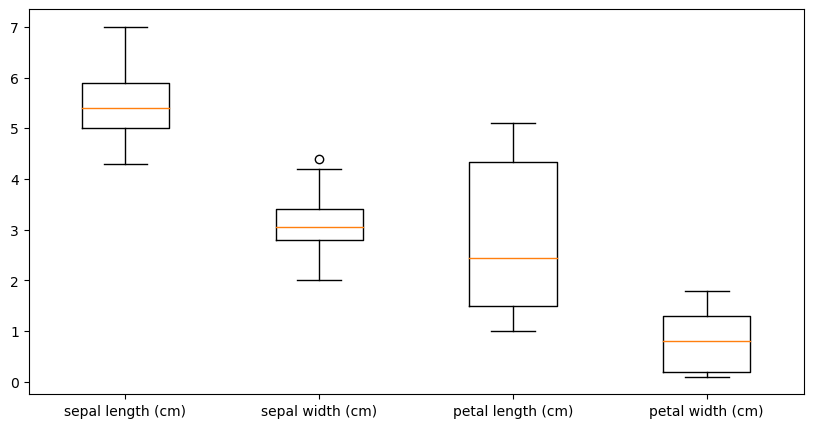

In [38]:
# 박스플롯
plt.figure(figsize = (10, 5))
plt.boxplot(two_iris_DF.iloc[:, :4])
plt.xticks(np.arange(1, 5), two_iris_DF.columns[:4])
plt.show()

[3] 상관관계 분석

In [39]:
two_iris_DF.corr(numeric_only=True)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.205926,0.812458,0.789608,0.728290
sepal width (cm),-0.205926,1.000000,-0.602663,-0.570883,-0.690684
petal length (cm),0.812458,-0.602663,1.000000,0.979322,0.969990
petal width (cm),0.789608,-0.570883,0.979322,1.000000,0.960307
target,0.728290,-0.690684,0.969990,0.960307,1.000000


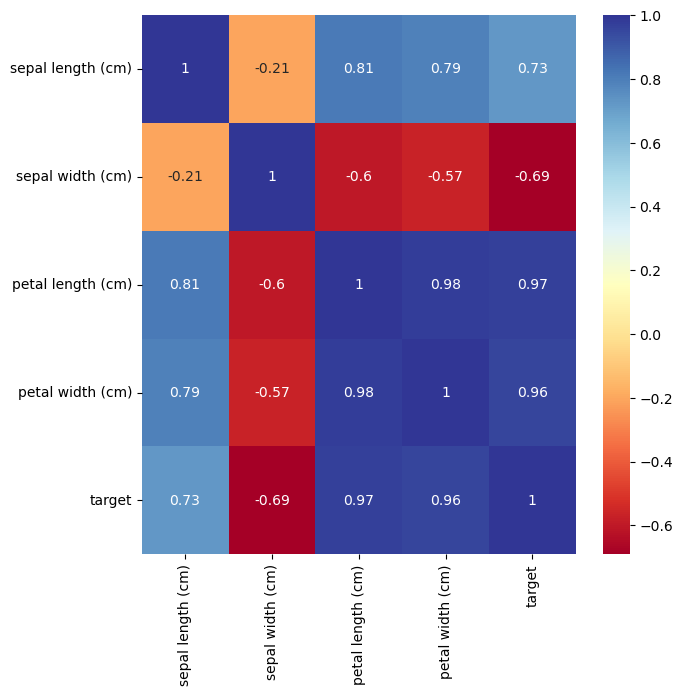

In [40]:
plt.figure(figsize=(7,7))
g = sns.heatmap(two_iris_DF.corr(), annot=True, cmap='RdYlBu')

[4] 탐색적분석

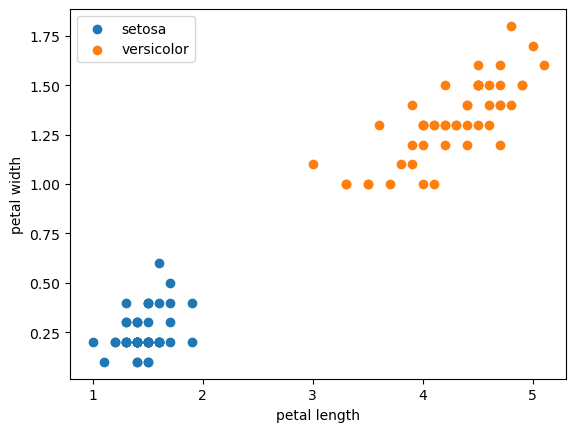

In [41]:
# petal length(cm) 와 petal width(cm)를 선택
setosa = two_iris_DF[two_iris_DF['target']==0]
versicolor = two_iris_DF[two_iris_DF['target']==1]

plt.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label='setosa')
plt.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label='versicolor')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.show()

[4] 학습준비

[4-1] 피쳐 타겟 설정

In [42]:
features = two_iris_DF[['petal length (cm)','petal width (cm)']]
target = two_iris_DF['target']

print(f'features : {features.shape}, {features.ndim}D')
print(f'target : {target.shape}, {target.ndim}D')

features : (100, 2), 2D
target : (100,), 1D


[4-2] 학습/테스트용 데이터셋 분리

In [43]:
# 비율 80:20
# stratify 비율 고려
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2,stratify=target, random_state=10)

In [44]:
# train:test = 80:20 체크
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')
print(f'X_test : {X_test.shape}, {X_test.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

X_train : (80, 2), 2D
y_train : (80,), 1D
X_test : (20, 2), 2D
y_test : (20,), 1D


[4-3] 피쳐 스케일링

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
# 스케일러 인스턴스 생성
mmScaler=MinMaxScaler()

In [47]:
mmScaler.fit(X_train)

MinMaxScaler()

In [48]:
# 학습용, 테스트용 데이터셋 스케일링 진행
# 학습용 데이터 ==> 스케일링 ==> ndarray 타입 반환
X_train_scaled=mmScaler.transform(X_train)
X_train_scaled.shape, X_train_scaled.min(), X_train_scaled.max()

((80, 2), 0.0, 1.0)

In [49]:
# 테스트용 데이터 ==> 스케일링  ==> ndarray 타입 반환
X_test_scaled= mmScaler.transform(X_test)
X_test_scaled.shape, X_test_scaled.min(), X_test_scaled.max()

((20, 2), 0.0, 0.878048780487805)

[5] 모델 생성

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
# 인스턴스 생성
model = KNeighborsClassifier()

In [52]:
# 학습 진행 -> 학습용 데이터셋
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

[6] 모델 평가

In [53]:
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

In [54]:
print(f'테스트 결정계수: {model.score(X_test_scaled, y_test)}')

테스트 결정계수: 1.0


In [55]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test_scaled)

# 모델의 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuarcy = accuracy_score(y_test, y_pred)

print(f'mse : {mse}')
print(f'r2 : {r2}')
print(f'accuarcy: {accuarcy}') 

mse : 0.0
r2 : 1.0
accuarcy: 1.0


[7] 예측값 시각화

In [56]:
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

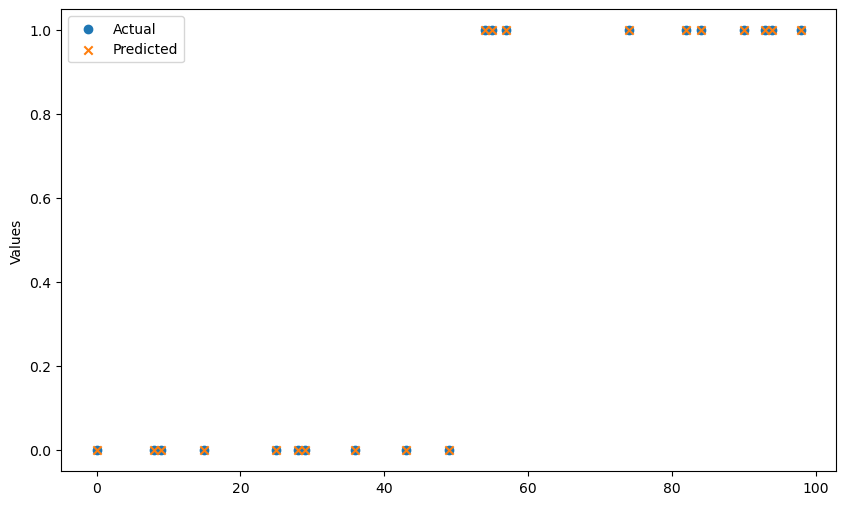

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(df_results.index, df_results['Actual'], label='Actual', marker='o')
plt.scatter(df_results.index, df_results['Predicted'], label='Predicted', marker='x')
plt.ylabel('Values')
plt.legend()
plt.show()